In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd



In [2]:
#Loading the dataset
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
#Finding any missing_values
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [4]:
#Dropping unnecessary cols
df.drop(['id','dataset'],axis=1,inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
#Replacing zeros with NA in specific cols
df[['trestbps', 'chol', 'oldpeak']] = df[['trestbps', 'chol', 'oldpeak']].replace(0,np.nan)

In [6]:
#rechecking missing values
df.isna().sum()

age           0
sex           0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak     432
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
#checking zero vals
(df==0).sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs         692
restecg       0
thalch        0
exang       528
oldpeak       0
slope         0
ca          181
thal          0
num         411
dtype: int64

In [8]:
#Dealing with missing values with their median and mode value
from sklearn.impute import SimpleImputer

imputer_median = SimpleImputer(missing_values=np.nan,strategy='median')
imputer_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')


df[['trestbps','chol','thalch','oldpeak']] = imputer_median.fit_transform(df[['trestbps','chol','thalch','oldpeak']].astype('object'))
df[['fbs','restecg','exang']] = imputer_mode.fit_transform(df[['fbs','restecg','exang']])

In [9]:
#Confirming the missing values handled or not
df.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       309
ca          611
thal        486
num           0
dtype: int64

In [10]:
#Final dataset after cleaning the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [11]:
#Checking distribution of binary features
print(df['fbs'].value_counts(dropna=False))
print(df['exang'].value_counts(dropna=False))


fbs
False    782
True     138
Name: count, dtype: int64
exang
False    583
True     337
Name: count, dtype: int64


In [12]:
#Defining numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
numerical_cols

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

In [13]:
#Defining the categorical features
categorical_cols = ['cp','restecg','slope','thal']
categorical_cols

['cp', 'restecg', 'slope', 'thal']

In [14]:
#Defining the categorical_ordinal features
cat_ordinals = ['sex','fbs','exang']


print(df['fbs'].unique())
print(df['exang'].unique())
print(df['sex'].unique())





[True False]
[False True]
['Male' 'Female']


In [15]:
#Previewing the combinations of ordinal categorical features
print(df[['sex','fbs','exang']].value_counts(dropna=False).reset_index())

      sex    fbs  exang  count
0    Male  False  False    356
1    Male  False   True    251
2  Female  False  False    139
3    Male   True  False     76
4    Male   True   True     43
5  Female  False   True     36
6  Female   True  False     12
7  Female   True   True      7


In [16]:
#Ordinal Encoding with the categorical ordinals
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df[cat_ordinals] = ordinal_encoder.fit_transform(df[cat_ordinals])

In [17]:
#One Hot encoding with categorical cols
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), cat_ordinals)],remainder='passthrough')
df_ct = pd.DataFrame(ct.fit_transform(df).astype('object'))
df_ct.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,1.0,1.0,0.0,63,typical angina,145.0,233.0,lv hypertrophy,150.0,2.3,downsloping,0.0,fixed defect,0
1,0.0,1.0,1.0,0.0,0.0,1.0,67,asymptomatic,160.0,286.0,lv hypertrophy,108.0,1.5,flat,3.0,normal,2
2,0.0,1.0,1.0,0.0,0.0,1.0,67,asymptomatic,120.0,229.0,lv hypertrophy,129.0,2.6,flat,2.0,reversable defect,1
3,0.0,1.0,1.0,0.0,1.0,0.0,37,non-anginal,130.0,250.0,normal,187.0,3.5,downsloping,0.0,normal,0
4,1.0,0.0,1.0,0.0,1.0,0.0,41,atypical angina,130.0,204.0,lv hypertrophy,172.0,1.4,upsloping,0.0,normal,0


In [18]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1.0,typical angina,145.0,233.0,1.0,lv hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0
1,67,1.0,asymptomatic,160.0,286.0,0.0,lv hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2
2,67,1.0,asymptomatic,120.0,229.0,0.0,lv hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1
3,37,1.0,non-anginal,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0
4,41,0.0,atypical angina,130.0,204.0,0.0,lv hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0
5,56,1.0,atypical angina,120.0,236.0,0.0,normal,178.0,0.0,0.8,upsloping,0.0,normal,0
6,62,0.0,asymptomatic,140.0,268.0,0.0,lv hypertrophy,160.0,0.0,3.6,downsloping,2.0,normal,3
7,57,0.0,asymptomatic,120.0,354.0,0.0,normal,163.0,1.0,0.6,upsloping,0.0,normal,0
8,63,1.0,asymptomatic,130.0,254.0,0.0,lv hypertrophy,147.0,0.0,1.4,flat,1.0,reversable defect,2
9,53,1.0,asymptomatic,140.0,203.0,1.0,lv hypertrophy,155.0,1.0,3.1,downsloping,0.0,reversable defect,1


In [19]:
#Defining preprocessor pipeline
from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_ordinals',OrdinalEncoder(),cat_ordinals),
        ('cat',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),cat_ordinals),
        ('num',StandardScaler(),numerical_cols)
    ]
)

In [20]:
preprocessor

ColumnTransformer(transformers=[('cat_ordinals', OrdinalEncoder(),
                                 ['sex', 'fbs', 'exang']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['sex', 'fbs', 'exang']),
                                ('num', StandardScaler(),
                                 ['age', 'trestbps', 'chol', 'thalch',
                                  'oldpeak', 'ca'])])

In [21]:
#Splitting dataset based on features and target

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
#Dropping the rows with missing values from X and y accordingly
X = X.dropna()
y = y[X.index]

In [23]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.199,stratify=y, random_state=42)
print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (239, 13)
X_test shape: (60, 13)
y_train shape: (239,)
y_test shape: (60,)


In [24]:
#Checking the type of the x_trained data
type(X_train)

pandas.core.frame.DataFrame

In [25]:
#Checking the columns in the training set
print(X_train.columns.tolist())


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [26]:
#Transforming the features using te preprocessor pipeline
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [27]:
print(y.value_counts())

num
0    160
1     56
2     35
3     35
4     13
Name: count, dtype: int64


In [28]:
#Training the models(Logistic regression,random forest classifier,support vector machine and xboost classifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


lr = LogisticRegression(class_weight='balanced',max_iter=1000)
rf = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42)
svm = SVC(class_weight='balanced',probability=True)
xc = XGBClassifier(n_estimators=50,max_depth=5,eval_metric='mlogloss',random_state=42)


In [29]:
lr.fit(X_test_transformed, y_test)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [30]:
rf.fit(X_test_transformed, y_test)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [31]:
svm.fit(X_test_transformed, y_test)

SVC(class_weight='balanced', probability=True)

In [32]:
xc.fit(X_test_transformed, y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [33]:
#predictions based on each model
y_pred_lr = lr.predict(X_test_transformed)
y_pred_rf = rf.predict(X_test_transformed)
y_pred_svm = svm.predict(X_test_transformed)
y_pred_xc = xc.predict(X_test_transformed)


In [34]:
#predictions for roc-auc score
y_pred_prob_lr = lr.predict_proba(X_test_transformed)
y_pred_prob_rf = rf.predict_proba(X_test_transformed)
y_pred_prob_svm = svm.predict_proba(X_test_transformed)
y_pred_prob_xc = xc.predict_proba(X_test_transformed)


In [35]:
#Defining the evaluation function for each model
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


def evaluate_score(name,y_true,y_pred,y_pred_prob):
    print(f'\n{name} Evaluation: ')
    print(f'\tAccuracy: {accuracy_score(y_true,y_pred):.2f}')
    try:
        roc_auc = roc_auc_score(y_true,y_pred_prob,multi_class='ovr',average='macro')
        print(f'\tROC AUC (macro,ovr): {roc_auc:.2f}')
    except ValueError as e:
        print("\tROC AUC  can't be calculated",e)

    print("\n Classification Report:\n ",classification_report(y_true,y_pred,zero_division=0))


In [36]:
#Performing the  cross validation on XGBoost
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xc, X_test_transformed, y_test, cv=5, scoring='accuracy')
print("XGBoost CV Accuracy:", cv_scores.mean())


C:\Users\debas\PycharmProjects\Code_Alpha_Internship_Tasks\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


XGBoost CV Accuracy: 0.5333333333333334


### Train vs Test Accuracy for Each model

In [37]:
y_pred_rf_2 = rf.predict(X_train_transformed)

In [38]:
y_train_acc_rf = accuracy_score(y_train,y_pred_rf_2)

y_pred_test_rf = rf.predict(X_test_transformed)
y_test_acc_rf  = accuracy_score(y_test,y_pred_test_rf)
print("Train vs test accuracy RF:",y_train_acc_rf,y_test_acc_rf)

Train vs test accuracy RF: 0.5439330543933054 1.0


In [39]:
y_train_xc_2 = xc.predict(X_train_transformed)
y_train_acc_xc = accuracy_score(y_train,y_train_xc_2)
y_pred_test_xc = xc.predict(X_test_transformed)
y_test_acc_xc = accuracy_score(y_test,y_pred_test_xc)
print(f"Train accuracy XGBOOST:{y_train_acc_xc}\n Testing Accuracy XGBOOST:{y_test_acc_xc}")

Train accuracy XGBOOST:0.5397489539748954
 Testing Accuracy XGBOOST:1.0


In [40]:
evaluate_score('Logistic Regression',y_test,y_pred_lr,y_pred_prob_lr)


Logistic Regression Evaluation: 
	Accuracy: 0.80
	ROC AUC (macro,ovr): 0.93

 Classification Report:
                precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.60      0.55      0.57        11
           2       0.83      0.71      0.77         7
           3       0.86      0.86      0.86         7
           4       0.43      1.00      0.60         3

    accuracy                           0.80        60
   macro avg       0.73      0.80      0.74        60
weighted avg       0.83      0.80      0.81        60



In [41]:
evaluate_score('Random Forest',y_test,y_pred_rf,y_pred_prob_rf)


Random Forest Evaluation: 
	Accuracy: 1.00
	ROC AUC (macro,ovr): 1.00

 Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [42]:
evaluate_score('SVM',y_test,y_pred_svm,y_pred_prob_svm)


SVM Evaluation: 
	Accuracy: 0.90
	ROC AUC (macro,ovr): 0.79

 Classification Report:
                precision    recall  f1-score   support

           0       0.94      0.94      0.94        32
           1       0.69      0.82      0.75        11
           2       1.00      0.71      0.83         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3

    accuracy                           0.90        60
   macro avg       0.93      0.89      0.90        60
weighted avg       0.91      0.90      0.90        60



In [43]:
evaluate_score('XGBOOST',y_test,y_pred_xc,y_pred_prob_xc)


XGBOOST Evaluation: 
	Accuracy: 1.00
	ROC AUC (macro,ovr): 1.00

 Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



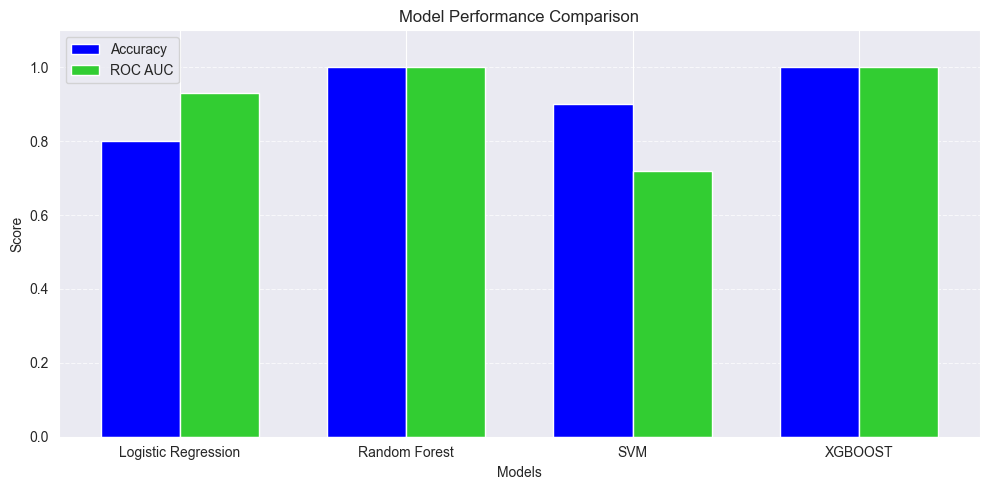

In [44]:
#Plotting the models' performance
import matplotlib.pyplot as plt

models =['Logistic Regression','Random Forest','SVM','XGBOOST']
accuracy = [0.80,1.00,0.90,1.00]
roc_auc_each = [0.93,1.00,0.72,1.00]

x = range(len(models))

plt.figure(figsize=(10,5))
bar_width = 0.35

plt.bar(x,accuracy,width=bar_width,label='Accuracy',color='blue')
plt.bar([i +bar_width for i in x],roc_auc_each,width=bar_width,label='ROC AUC',color='limegreen')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks([i +bar_width/2 for i in x],models)
plt.ylim(0,1.1)
plt.legend()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.style.use('dark_background')
plt.tight_layout()
plt.show()